In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import missingno as msno


from sklearn.linear_model import LogisticRegression

In [5]:
dataDir = "diabetes_prediction_dataset.csv"

In [7]:
df = pd.read_csv(dataDir)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


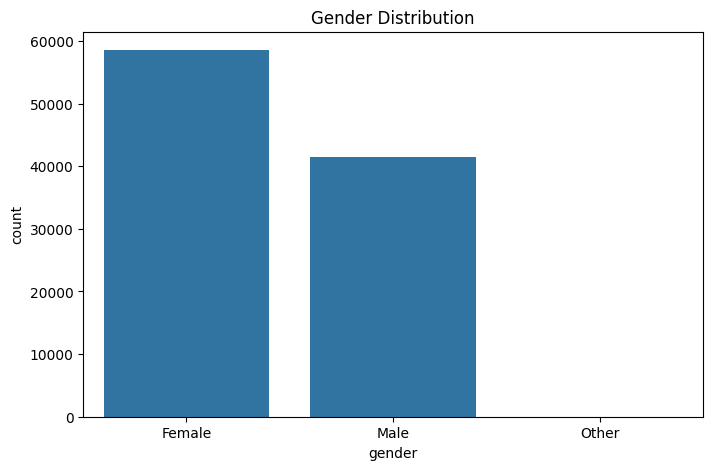

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

In [11]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

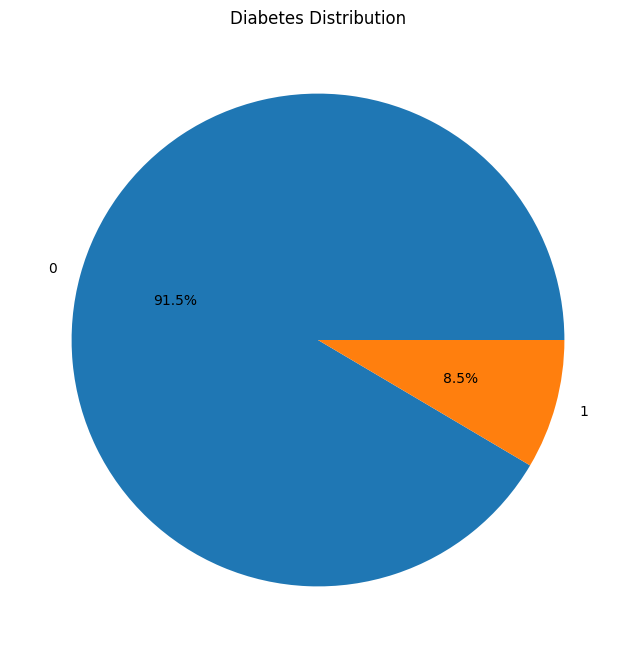

In [12]:
diabetes_counts = df['diabetes'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title("Diabetes Distribution")
plt.show()

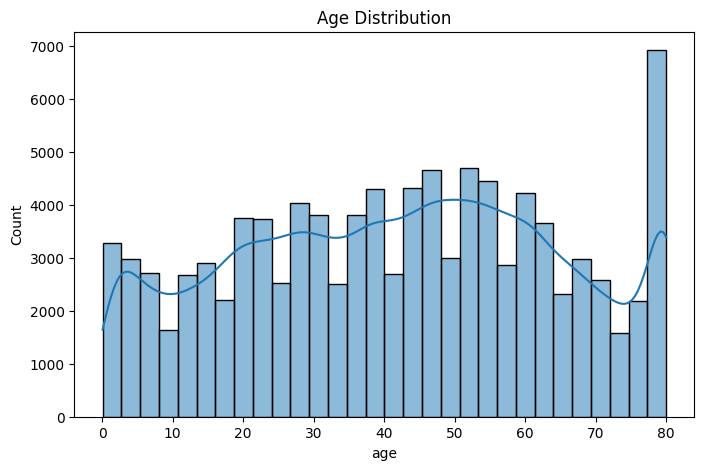

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

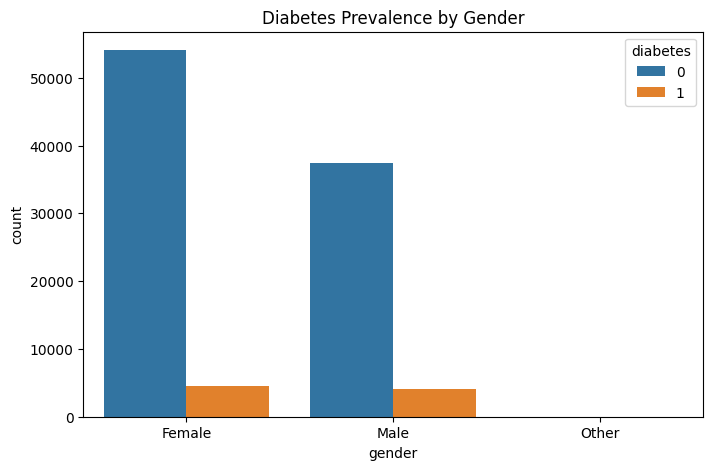

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Diabetes Prevalence by Gender")
plt.show()

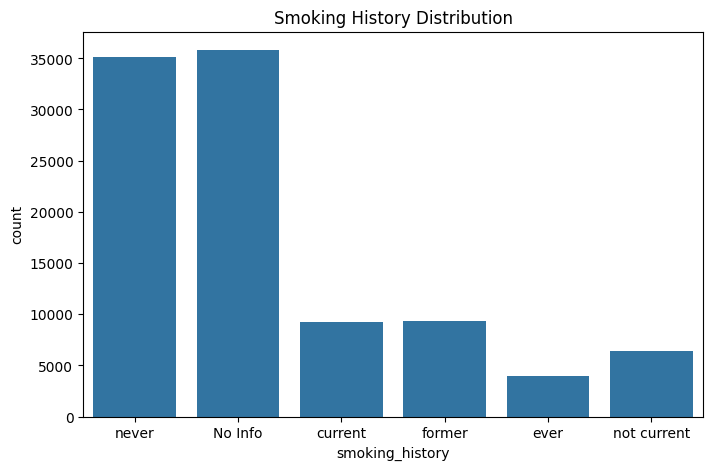

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smoking_history')
plt.title("Smoking History Distribution")
plt.show()

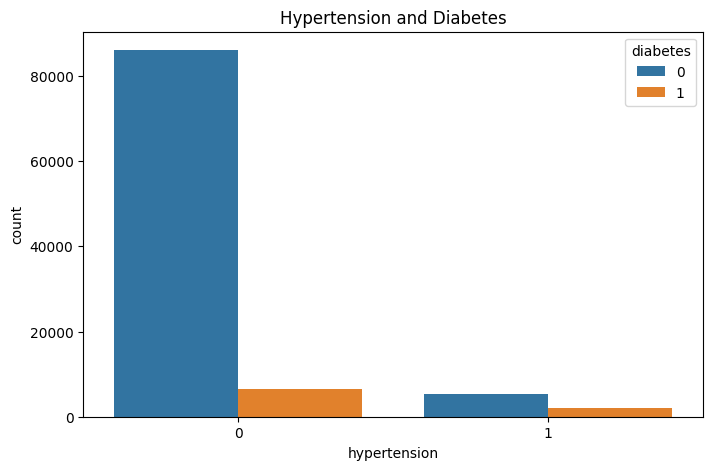

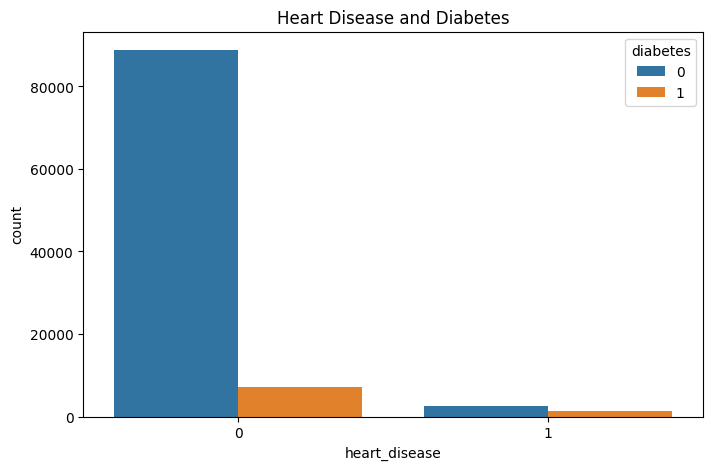

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title("Hypertension and Diabetes")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title("Heart Disease and Diabetes")
plt.show()

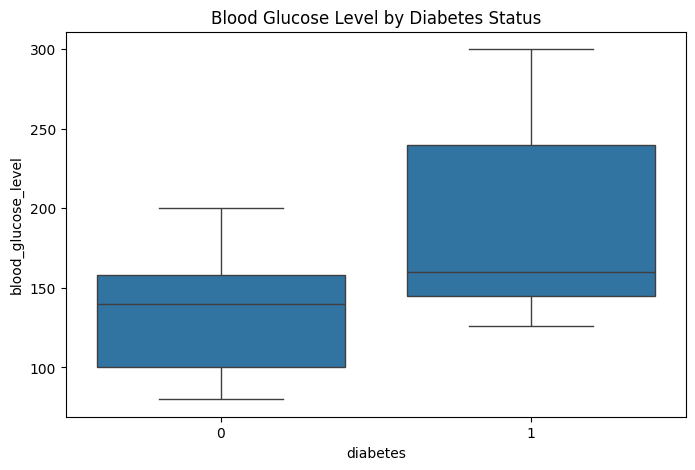

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title("Blood Glucose Level by Diabetes Status")
plt.show()

In [18]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [20]:
df['smoking_history'] = df['smoking_history'].map({
    'No Info': 0,
    'never': 0,
    'former': 1,
    'current': 1,
    'not current': 1,
    'ever': 1
})

In [21]:
df['gender'] = df['gender'].map({
    'Female': 0,
    'Other': 0,
    'Male': 1,
})

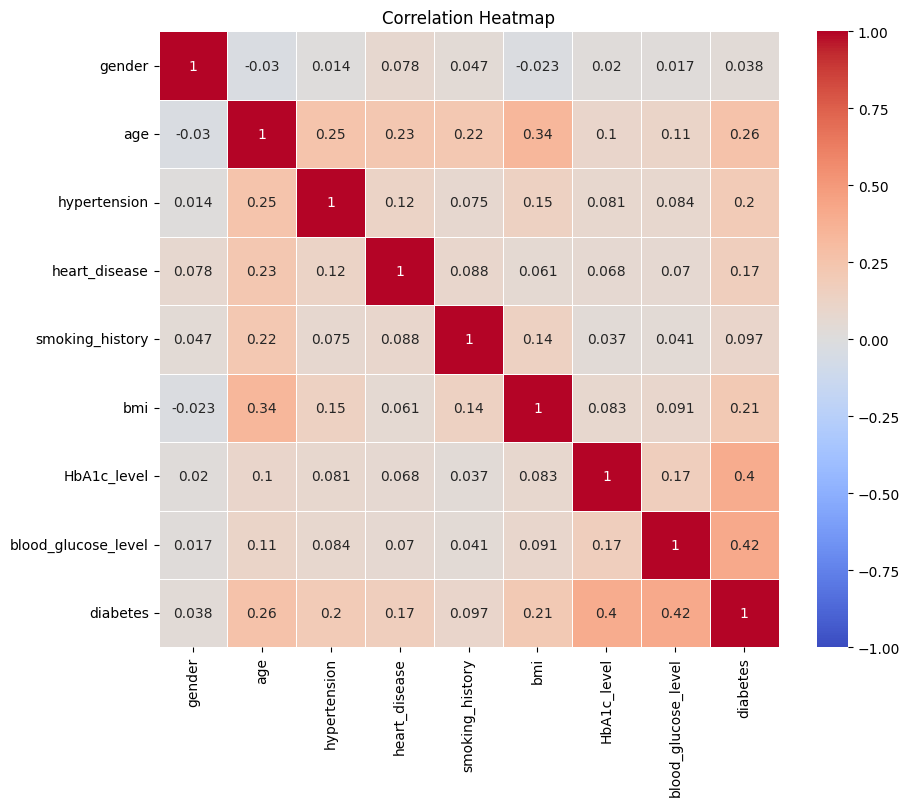

In [22]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = df.drop(columns = ["diabetes"])
Y = df["diabetes"].values.reshape(-1, 1)

In [24]:
Y.shape

(100000, 1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 55)

In [26]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
model.score(X_train, Y_train)

0.958825

In [28]:
y_pred = model.predict(X_test)

In [29]:
print(accuracy_score(y_pred, Y_test))

0.96065


In [30]:
print(mean_squared_error(y_pred, Y_test))

0.03935


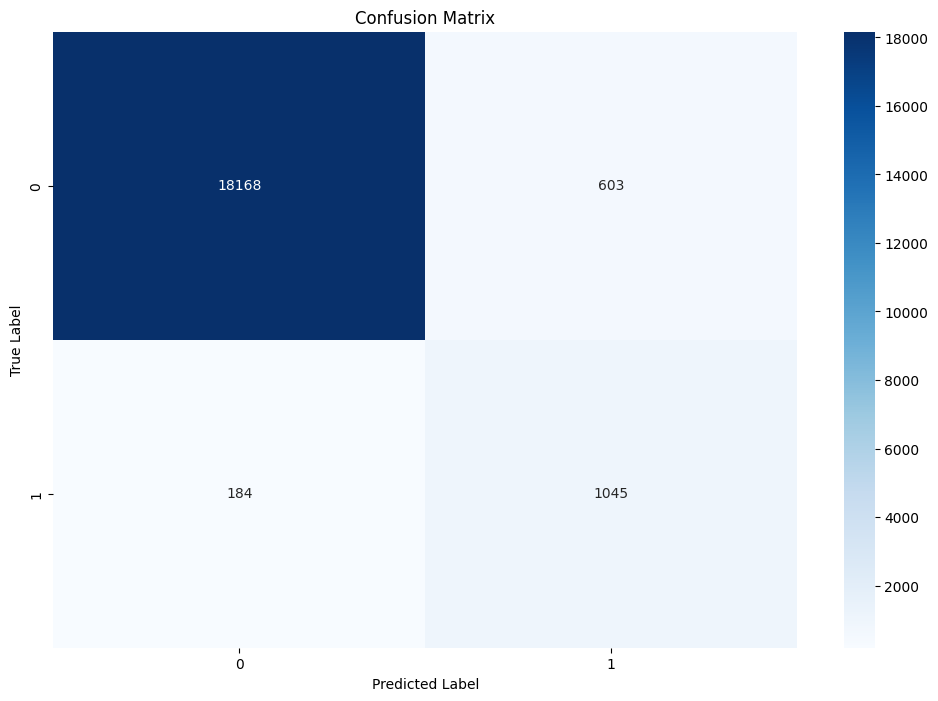

In [31]:
cm = confusion_matrix(y_pred, Y_test)


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [172]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
70000,0,43.0,0,0,0,21.37,6.5,130
82651,1,20.0,0,0,0,24.70,6.5,145
8077,0,31.0,0,0,0,27.32,4.0,155
28178,0,30.0,0,0,1,36.61,6.6,158
81918,0,64.0,0,0,1,27.32,6.5,159
...,...,...,...,...,...,...,...,...
75351,0,36.0,0,0,0,42.93,4.5,90
76504,1,10.0,0,0,0,28.53,5.0,145
74498,0,3.0,0,0,0,13.22,5.7,80
61148,1,80.0,0,0,0,27.32,6.6,159


In [196]:
import onnxruntime as rt
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

In [202]:
initial_type = [("input", FloatTensorType([None, X_train.shape[1]]))]
onx = convert_sklearn(model, initial_types=initial_type)
with open("diabetesModel.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [205]:
def onnxPredictData(data, path = "diabetesModel.onnx") -> list:
    sess = rt.InferenceSession(path, providers=["CPUExecutionProvider"])
    input_name = sess.get_inputs()[0].name
    if type(data) == list:
        pred_onx = sess.run(None , {input_name: np.float32(data)})[0]
        return pred_onx.tolist()
    if type(data) == pandas.core.frame.DataFrame:
        pred_onx = sess.run(None , {input_name: data.values.astype(np.float32)})[0]
        return pred_onx.tolist()

In [209]:
print(X_test.columns.tolist())
# onnxPredictData(X_test)
onnxPredictData([[0,43.1,1,1,1,21.37,6.5,130]])[0]
# print(type(X_test))

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


0